In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from random import *
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
def dataGenerat(l11,h11,l12,h12,size):
    x1 = np.random.randint(l11, h11 , size) 
    y1 = np.random.randint(0,100 , size)  
    data1 = [[np.random.choice(x1),  np.random.choice(y1)] for i in range(size)] 
    x2 = np.random.randint(l12, h12 , size) 
    y2 = np.random.randint(0,100 , size)  
    data2 = [[np.random.choice(x2),  np.random.choice(y2)] for i in range(size)]
    X = np.vstack((data1,data2))
    labels_true = size*[0] + size*[1]
    # visualisation des données
    #plt.scatter(X[:,0],X[:,1], c= labels_true)

    return X, labels_true

def testMetrics (X, y):
    result = []
    clustering_metrics = [
            metrics.homogeneity_score,
            metrics.completeness_score,
            metrics.v_measure_score,
            metrics.adjusted_rand_score,
            metrics.adjusted_mutual_info_score,
        ]

    for cMetric in clustering_metrics :
            result.append(round(cMetric(X, y),3))
    return result

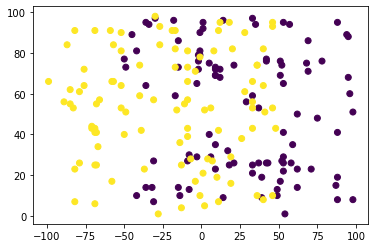

In [3]:
l1 = -50
h1 = 100
l2 = -100
h2 = 50

size = 100
k=2


X, labels_true = dataGenerat(l1,h1,l2,h2,size)
plt.scatter(X[:,0],X[:,1], c= labels_true)

__________________________________________________
homo	compl	v-meas	ARI	AMI	silhouette
0.075	0.075	0.075	0.098	0.072	0.398
__________________________________________________
C1:  [ 39.64423077 -37.875     ]


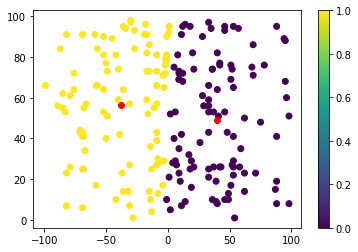

In [4]:

# définition et entrainement du model
model = KMeans(n_clusters=k, random_state=0)
#clusters = model.fit_predict(X)

# prédiction
labels_predict = model.fit_predict(X)

results = testMetrics (labels_true, labels_predict)

labels_kmean = model.labels_
results.append(round(metrics.silhouette_score(X, labels_predict, metric='euclidean'),3))

# affichage du résultat
print(50 * '_')
print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
formatter_result = ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
print(formatter_result.format(*results))
print(50 * '_')

# visualisation avec les centoides
plt.scatter(X[:,0],X[:,1], c = labels_predict)
#plt.scatter(X[:,0],X[:,1], c = labels_true)

print("C1: ", model.cluster_centers_[:,0])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')
plt.colorbar()

__________________________________________________
homo	compl	v-meas	ARI	AMI	silhouette
0.783	0.508	0.616	0.607	0.614	0.451
__________________________________________________
C1:  [-63.95555556  33.96610169  54.70588235]


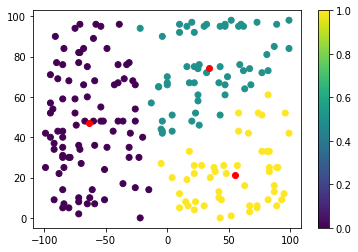

In [5]:
# définition du 2eme jeu de données : test 2
l1 = 0
h1 = 100
l2 = -100
h2 = 0
size = 100
k=3

X, labels_true = dataGenerat(l1,h1,l2,h2,size)
# définition et entrainement du model
model = KMeans(n_clusters=k, random_state=0)
#clusters = model.fit_predict(X)

# prédiction
labels_predict = model.fit_predict(X)

results = testMetrics (labels_true, labels_predict)

labels_kmean = model.labels_
results.append(round(metrics.silhouette_score(X, labels_predict, metric='euclidean'),3))

# affichage du résultat
print(50 * '_')
print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
formatter_result = ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
print(formatter_result.format(*results))
print(50 * '_')

# visualisation avec les centoides
plt.scatter(X[:,0],X[:,1], c = labels_predict)
#plt.scatter(X[:,0],X[:,1], c = labels_true)

print("C1: ", model.cluster_centers_[:,0])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')
plt.colorbar()

__________________________________________________
homo	compl	v-meas	ARI	AMI	silhouette
0.165	0.072	0.100	0.049	0.095	0.389
__________________________________________________
C1:  [ 80.52631579 -48.         -55.43636364  28.125       14.05128205]


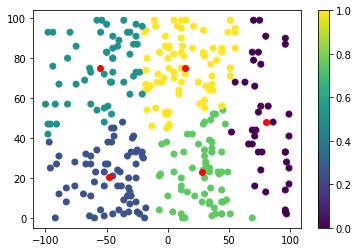

In [13]:

# définition du 2eme jeu de données : test 3
l1 = -100
h1 = 50

l2 = -50
h2 = 100

size = 150
k=5

X, labels_true = dataGenerat(l1,h1,l2,h2,size)
# définition et entrainement du model
model = KMeans(n_clusters=k, random_state=0)
#clusters = model.fit_predict(X)

# prédiction
labels_predict = model.fit_predict(X)

results = testMetrics (labels_true, labels_predict)

labels_kmean = model.labels_
results.append(round(metrics.silhouette_score(X, labels_predict, metric='euclidean'),3))

# affichage du résultat
print(50 * '_')
print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
formatter_result = ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
print(formatter_result.format(*results))
print(50 * '_')

# visualisation avec les centoides
plt.scatter(X[:,0],X[:,1], c = labels_predict)
#plt.scatter(X[:,0],X[:,1], c = labels_true)

print("C1: ", model.cluster_centers_[:,0])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')
plt.colorbar()